In [0]:
# !pip3 install beautifulsoup4
# !pip3 install requests
# !pip3 install TextBlob
# !pip3 install WordCloud

In [1]:
import dataiku
import pandas
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Sample Data

In [2]:
# Example: load a DSS dataset as a Pandas dataframe
df = dataiku.Dataset("Reviws_PA_prepared")
df = df.get_dataframe()
#df.count()

In [4]:
df = df[df.Reviews_Processed.notnull()]
df.count()

Source               124
Reviews              124
Reviews_Processed    124
Type                  72
Rating               124
dtype: int64

# Sentiment Scoring

In [6]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Reviews_Processed'].apply(getSubjectivity)
df['Polarity'] = df['Reviews_Processed'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'

In [7]:
df.head()

,Source,Reviews,Reviews_Processed,Type,Rating,Subjectivity,Polarity
0,Google Reviews,The old building used to be Victoria school. P...,old building used victoria school pa head quar...,NaN,4.0,0.232143,0.103571
1,Google Reviews,My interaction with an executive of the PA lef...,interaction executive pa left feeling rather d...,NaN,1.0,0.540000,-0.260000
2,Google Reviews,Big and cool place to chill and relax with lik...,big cool place chill relax like minded staff p...,NaN,4.0,0.542857,0.342857
3,Google Reviews,"More commonly known as PA HQ, it's the headqua...",commonly known pa hq headquarters ccs rcs ncs ...,NaN,5.0,0.500000,-0.300000
4,Google Reviews,"Just talk to a pa officer,ask one question n r...",just talk pa officer ask one question n return...,NaN,1.0,0.500000,0.500000


# WordCloud

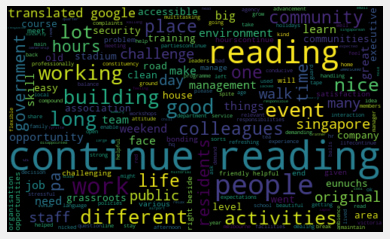

In [8]:
# word cloud visualization
allWords = ' '.join([rvws for rvws in df['Reviews_Processed']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
#Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
#     elif score == 0:
#       return 'Neutral'
    else:
      return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Source,Reviews,Reviews_Processed,Type,Rating,Subjectivity,Polarity,Analysis
0,Google Reviews,The old building used to be Victoria school. P...,old building used victoria school pa head quar...,NaN,4.0,0.232143,0.103571,Positive
1,Google Reviews,My interaction with an executive of the PA lef...,interaction executive pa left feeling rather d...,NaN,1.0,0.540000,-0.260000,Negative
2,Google Reviews,Big and cool place to chill and relax with lik...,big cool place chill relax like minded staff p...,NaN,4.0,0.542857,0.342857,Positive
3,Google Reviews,"More commonly known as PA HQ, it's the headqua...",commonly known pa hq headquarters ccs rcs ncs ...,NaN,5.0,0.500000,-0.300000,Negative
4,Google Reviews,"Just talk to a pa officer,ask one question n r...",just talk pa officer ask one question n return...,NaN,1.0,0.500000,0.500000,Positive
5,Google Reviews,Big nice place,big nice place,NaN,5.0,0.550000,0.300000,Positive
6,Google Reviews,Good lah,good lah,NaN,4.0,0.600000,0.700000,Positive
7,Google Reviews,It is refreshing to read about my decision to ...,refreshing read decision make singapore home s...,NaN,5.0,0.727273,0.318182,Positive
8,Google Reviews,Good venue for workshops and meetings. The bui...,good venue workshops meetings building easily ...,NaN,4.0,0.558333,0.480556,Positive
9,Google Reviews,"Tea break no supplies if coffee, tea or any be...",tea break supplies coffee tea beverages,NaN,3.0,0.000000,0.000000,Positive


In [0]:
# # Plotting
# plt.figure(figsize=(8,6))
# for i in range(0, df.shape[0]):
#     plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')
# # plt.scatter(x,y,color)
# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [10]:
df["Subjectivity"].count()

124

In [11]:
print("The percentage of positive tweets:")
previews = df[df.Analysis == 'Positive']
previews = previews['Reviews']
previews
round( (previews.shape[0] / df.shape[0]) * 100 , 1)

The percentage of positive tweets:


87.9

In [12]:
print("The percentage of negative tweets:")
nreviews = df[df.Analysis == 'Negative']
nreviews = nreviews['Reviews']
nreviews

round( (nreviews.shape[0] / df.shape[0]) * 100, 1)

The percentage of negative tweets:


12.1

In [13]:
# Show the value counts
df['Analysis'].value_counts()

Positive    109
Negative     15
Name: Analysis, dtype: int64

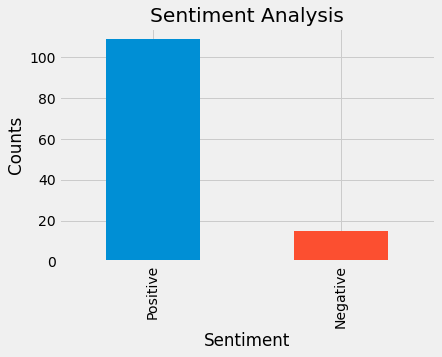

In [14]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [15]:
# Recipe outputs
sentiments_ouptut = dataiku.Dataset("Sentiments_Ouptut")
sentiments_ouptut.write_with_schema(df)

124 rows successfully written (67kAsmd45D)
